# best track

In [38]:
import time
import scipy.io as sio
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime


# data = xr.open_dataset("D:/BaiduNetdiskDownload/IBTrACS.WP.v04r00.nc")
data = xr.open_dataset("D:/BaiduNetdiskDownload/IBTrACS.since1980.v04r00.nc")
t =data["time"]
yyyy=t["time.year"].values
m=t["time.month"].values
tttt=t["time"].dt.strftime('%Y%m%d')
lon =data["usa_lon"].values
lat =data["usa_lat"].values
v =data["usa_wind"]

p1=1982
p2=2019
nt=yyyy[:,0]
year_wp = np.where((nt>= p1) & (p2 >= nt))
year_wp = np.squeeze(year_wp)
t=tttt[year_wp]#[:,::2]
lon = lon[year_wp]#[:,::2]
lat = lat[year_wp]#[:,::2]
v = v[year_wp]#[:,::2]
m = m[year_wp]#[:,::2]
lmi = np.nanmax(v,axis=1)

v = v[lmi>=25]
t = t[lmi>=25]
m = m[lmi>=25]
lat = lat[lmi>=25]
lon = lon[lmi>=25]
lmi = lmi[lmi>=25]

wind = []
genesis_lat = []
genesis_lon = []
lmi_lat = []
lmi_lon = []
genesis_month = []

# #--------------------------------------------------------------
for i in range(v.shape[0]):
    row = v[i].values
    index_g = np.nanargmax(row >= 25)
    index_lmi = np.nanargmax(row >= lmi[i])
    wind.append(v[i])
    genesis_lat.append(lat[i,index_g])
    genesis_lon.append(lon[i,index_g])
    lmi_lat.append(lat[i,index_lmi])
    lmi_lon.append(lon[i,index_lmi])
    genesis_month.append(m[i,index_g])
# # MJJASO--------------------------------------------------------------           
MJJASO_idx = np.where((np.array(genesis_month)>=5) & (np.array(genesis_month)<=10))
wind = [wind[i] for i in MJJASO_idx[0]]
genesis_lat = np.array(genesis_lat)[MJJASO_idx]
genesis_lon = np.array(genesis_lon)[MJJASO_idx]
lmi_lat = np.array(lmi_lat)[MJJASO_idx]
lmi_lon = np.array(lmi_lon)[MJJASO_idx]        
# # location limit--------------------------------------------------------------     
LOC_idx = np.where((genesis_lat>=5) & (genesis_lat<=20) &(genesis_lon>=128) & (genesis_lon<=180) & (lmi_lat<=30))
wind = [wind[i] for i in LOC_idx[0]]
genesis_lat = genesis_lat[LOC_idx]
genesis_lon = genesis_lon[LOC_idx]
lmi_lat = lmi_lat[LOC_idx]
lmi_lon = lmi_lon[LOC_idx]

len(wind)

C:\Users\hongjiacheng\AppData\Local\Temp\ipykernel_8868\3870068621.py:29: RuntimeWarning: All-NaN axis encountered
  lmi = np.nanmax(v,axis=1)


463

# MHW

In [2]:
start_date = np.datetime64('1982-01-01')
end_date   = np.datetime64('2023-01-01')
mhw_times  = np.arange(start_date, end_date, dtype='datetime64[D]')
print(mhw_times.shape)
mhw_times[-1]

(14975,)


numpy.datetime64('2022-12-31')

In [3]:
data = np.load('D:/BaiduNetdiskDownload/Wp_mhw_data.npz', allow_pickle=True)
mhw_index = data["mhw_index_3d"]
mhw_index.shape

(240, 320, 14975)

In [23]:
ds = xr.open_mfdataset('D:/BaiduNetdiskDownload/sst.day.mean.2004.nc')
lons = ds['lon'][400:720].values
lats = ds['lat'][360:600].values# 360:640,1040:1440

In [50]:
lats

array([ 0.125,  0.375,  0.625,  0.875,  1.125,  1.375,  1.625,  1.875,
        2.125,  2.375,  2.625,  2.875,  3.125,  3.375,  3.625,  3.875,
        4.125,  4.375,  4.625,  4.875,  5.125,  5.375,  5.625,  5.875,
        6.125,  6.375,  6.625,  6.875,  7.125,  7.375,  7.625,  7.875,
        8.125,  8.375,  8.625,  8.875,  9.125,  9.375,  9.625,  9.875,
       10.125, 10.375, 10.625, 10.875, 11.125, 11.375, 11.625, 11.875,
       12.125, 12.375, 12.625, 12.875, 13.125, 13.375, 13.625, 13.875,
       14.125, 14.375, 14.625, 14.875, 15.125, 15.375, 15.625, 15.875,
       16.125, 16.375, 16.625, 16.875, 17.125, 17.375, 17.625, 17.875,
       18.125, 18.375, 18.625, 18.875, 19.125, 19.375, 19.625, 19.875,
       20.125, 20.375, 20.625, 20.875, 21.125, 21.375, 21.625, 21.875,
       22.125, 22.375, 22.625, 22.875, 23.125, 23.375, 23.625, 23.875,
       24.125, 24.375, 24.625, 24.875, 25.125, 25.375, 25.625, 25.875,
       26.125, 26.375, 26.625, 26.875, 27.125, 27.375, 27.625, 27.875,
      

# MHW TC

In [46]:
def day_of_period(date_str):
    # 定义起始日期和结束日期
    start_date = datetime(1982, 1, 1)
    end_date = datetime(2022, 12, 31)
    # 将输入日期字符串转换为日期对象
    current_date = datetime.strptime(date_str, '%Y-%m-%d')
    # 检查日期是否在范围内
    if current_date < start_date or current_date > end_date:
        raise ValueError("日期不在1982-2022年的范围内")
    # 计算第几天
    day_number = (current_date - start_date).days + 1
    return day_number

def find_indices_within_range(lats, lons,target_lat, target_lon, range_degrees=1):
    # 计算目标经纬度的范围
    lat_min = target_lat - range_degrees
    lat_max = target_lat + range_degrees
    lon_min = target_lon - range_degrees
    lon_max = target_lon + range_degrees
    # 查找在范围内的经纬度索引
    lat_indices = np.where((lats >= lat_min) & (lats <= lat_max))[0]
    lon_indices = np.where((lons >= lon_min) & (lons <= lon_max))[0]
    return lat_indices, lon_indices
# ----------------------------------------------------------------------------------------------
mhw_tc = np.ones((len(wind),wind[0].shape[0]))*np.nan
for i in range(len(wind)):
    row = wind[i]
    for j in range(row.shape[0]):
        wind_n = row.values[j]
        if np.isnan(wind_n):
            continue
        date_str = str(row["time"][j].dt.strftime('%Y-%m-%d').values)
        day_number = day_of_period(date_str)-1
        target_lat = row["lat"][j].values
        target_lon = row["lon"][j].values
        lat_indices, lon_indices = find_indices_within_range(lats, lons,target_lat, target_lon)
        mhw = mhw_index[np.ix_(lat_indices,lon_indices)][:,:,day_number]
        if np.any(mhw == 1):
            mhw_tc[i,j] = day_number # 赋值为热浪时间维索引
# ----------------------------------------------------------------------------------------------
wind_tc = np.array(wind)
lmi_tc = np.nanmax(wind_tc,1)
mhw_tc_index = mhw_tc
for i in range(wind_tc.shape[0]):
    row = wind_tc[i]
    index_g = np.argmax(row >= 25)
    index_lmi = np.argmax(row >= lmi_tc[i])
    mhw_tc_index [i,:index_g]= np.nan 
    mhw_tc_index [i,index_lmi+1:]= np.nan
mhw_i = []    
for i in range(mhw_tc_index.shape[0]) :
    ar,num=np.unique(mhw_tc_index[i] ,return_counts=True)
    mhw_i.append(num.shape[0]-1) # 除np.nan外的热浪索引，同一索引代表同一天的热浪，不同索引代表不同天的热浪。
mhw_i = np.array(mhw_i)    
num_MHW_TC = mhw_i[mhw_i>=2].shape # mhw_i>=2 代表经过2天以上热浪
g_lat_MHW = genesis_lat[mhw_i>=2]  # 
g_lon_MHW = genesis_lon[mhw_i>=2]  # 
print("num_MHW_TC:",num_MHW_TC)

num_MHW_TC: (125,)


In [41]:
aa = np.where(mhw_i>=2)
wind_mhw = [wind[i] for i in aa[0]]
wind_mhw

[<xarray.DataArray 'usa_wind' (date_time: 360)> Size: 1kB
 array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
 Coordinates:
     time     (date_time) datetime64[ns] 3kB 1982-05-16T00:00:00.000040448 ......
     lat      (date_time) float32 1kB ...
     lon      (date_time) float32 1kB ...
 Dimensions without coordinates: date_time
 Attributes:
     long_name:              Maximum sustained wind speed
     standard_name:          tropical_cyclone_maximum_sustained_wind_speed
     units:                  kts
     valid_min:              1
     valid_max:              250
     coverage_content_type:  physicalMeasurement,
 <xarray.DataArray 'usa_wind' (date_time: 360)> Size: 1kB
 array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
 Coordinates:
     time     (date_time) datetime64[ns] 3kB 1983-09-16T00:00:00.000040448 ......
     lat      (date_time) float32 1kB ...
     lon      (date_time) float32 1kB ...
 Dimensions without coordinates: date_time
 Attributes:
     long_name

# nonMHW TC

In [48]:
mhw_tc = np.ones((len(wind),wind[0].shape[0]))*np.nan
for i in range(len(wind)):
    row = wind[i]
    for j in range(row.shape[0]):
        wind_n = row.values[j]
        if np.isnan(wind_n):
            continue
        date_str = str(row["time"][j].dt.strftime('%Y-%m-%d').values)
        day_number = day_of_period(date_str)-1
        target_lat = row["lat"][j].values
        target_lon = row["lon"][j].values
        lat_indices, lon_indices = find_indices_within_range(lats, lons,target_lat, target_lon)
        mhw = mhw_index[np.ix_(lat_indices,lon_indices)][:,:,day_number]
        if np.any(mhw == 1):
            mhw_tc[i,j] = day_number # 赋值为热浪时间维索引
# ----------------------------------------------------------------------------------------------
mhw_tc_index = mhw_tc
nonmhw_i = []    
for i in range(mhw_tc_index.shape[0]) :
    ar,num=np.unique(mhw_tc_index[i] ,return_counts=True)
    nonmhw_i.append(num.shape[0]-1) # 除np.nan外的热浪索引，同一索引代表同一天的热浪，不同索引代表不同天的热浪。
nonmhw_i = np.array(nonmhw_i)    
num_nonMHW_TC = nonmhw_i[nonmhw_i==0].shape
g_lat_nonMHW = genesis_lat[nonmhw_i==0]
g_lon_nonMHW = genesis_lon[nonmhw_i==0]
print("num_nonMHW_TC:",num_nonMHW_TC)

num_nonMHW_TC: (194,)


In [43]:
bb = np.where(nonmhw_i==0)
wind_nonmhw = [wind[i] for i in bb[0]]
wind_nonmhw

[<xarray.DataArray 'usa_wind' (date_time: 360)> Size: 1kB
 array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
 Coordinates:
     time     (date_time) datetime64[ns] 3kB 1982-07-09T06:00:00.000040448 ......
     lat      (date_time) float32 1kB ...
     lon      (date_time) float32 1kB ...
 Dimensions without coordinates: date_time
 Attributes:
     long_name:              Maximum sustained wind speed
     standard_name:          tropical_cyclone_maximum_sustained_wind_speed
     units:                  kts
     valid_min:              1
     valid_max:              250
     coverage_content_type:  physicalMeasurement,
 <xarray.DataArray 'usa_wind' (date_time: 360)> Size: 1kB
 array([20., 22., 25., ..., nan, nan, nan], dtype=float32)
 Coordinates:
     time     (date_time) datetime64[ns] 3kB 1982-08-08T00:00:00.000040448 ......
     lat      (date_time) float32 1kB ...
     lon      (date_time) float32 1kB ...
 Dimensions without coordinates: date_time
 Attributes:
     long_name

# fig

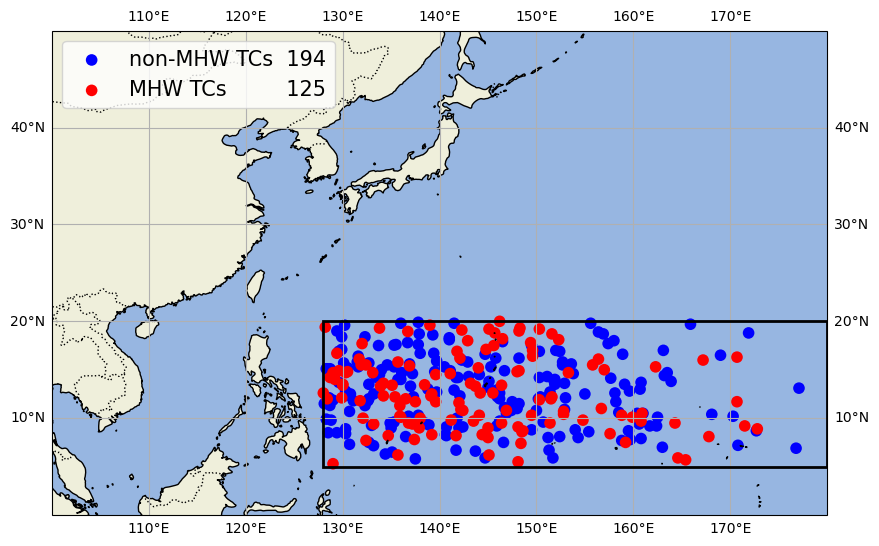

In [44]:
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as dt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
from matplotlib.patches import Rectangle
# import cmaps
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# 设置显示的经纬度范围
ax.set_extent([100, 180, 0, 50], crs=ccrs.PlateCarree())
# 添加地图特征
ax.add_feature(cfeature.LAND)  # 添加陆地
ax.add_feature(cfeature.OCEAN)  # 添加海洋
ax.add_feature(cfeature.COASTLINE)  # 添加海岸线
ax.add_feature(cfeature.BORDERS, linestyle=':')  # 添加国界线
ax.scatter(g_lon_nonMHW, g_lat_nonMHW, c='b', s=70, edgecolor='none', transform=ccrs.Geodetic(), label='non-MHW TCs  {}'.format(num_nonMHW_TC[0]))
ax.scatter(g_lon_MHW, g_lat_MHW , c='r', s=70, edgecolor='none', transform=ccrs.Geodetic(), label='MHW TCs         {}'.format(num_MHW_TC[0]) )
ax.legend(loc='upper left',fontsize=15)
ax.gridlines(draw_labels=True)
# ax.set_title("1982-2019")
RE=Rectangle((128, 5),180-128,20-5,linewidth=2,linestyle='-' ,zorder=2,\
              edgecolor='k',facecolor='none', transform=ccrs.PlateCarree()) #25表示纬度间隔25
ax.add_patch(RE)  #添加矩形框，如果这一句求掉了就没有框显示了

plt.savefig("c:/Users/hongjiacheng/Desktop/wp1982.png")